## **Aprendizaje profundo / MLP Básica (Core)**

### **MLP Básica (Core)**

En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

**Enlace al dataset:** https://www.kaggle.com/uciml/breast-cancer-wisconsin-data



### **Objetivo:**

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.



### **Instrucciones:**

#### 1. **Carga de datos:**
- Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
- Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

#### 2. **Exploración y preprocesamiento de datos:**
- Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
- Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

#### 3. **Implementación de la MLP:**
- Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
- Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.

#### 4. **Entrenamiento del modelo:**
- Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
- Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

#### 5. **Evaluación del modelo:**
- Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
- Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

Librerias y Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargar el dataset de Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target

Escalar y separar

In [2]:
# Preprocesamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Crear modelo

In [3]:
# Crear el modelo MLP
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=0)

Verificar el modelo

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


Evaluar el modelo

In [5]:
# Evaluar el modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nMetricas de Evaluacion:")
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 3ms/step

Metricas de Evaluacion:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Visualizar resultados

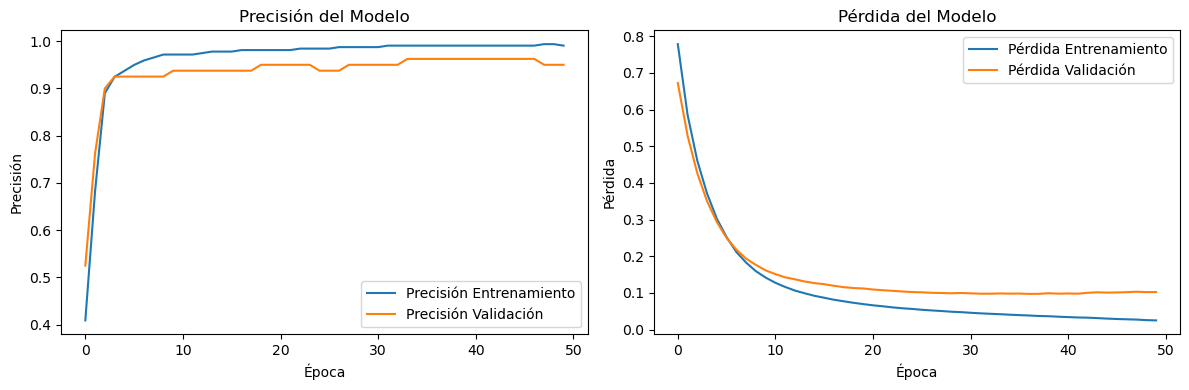

In [6]:
# Visualizar curvas de aprendizaje
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()